In [5]:
from io import StringIO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:

def conf_interval_left(data, confidence=95):
    # return st.t.interval(confidence/100.0, len(data)-1, loc=np.mean(data), scale=st.sem(data))[0]
    return sns.utils.ci(sns.algorithms.bootstrap(data, n_boot=1000), which=confidence)[0]

def conf_interval_right(data, confidence=95):
    return sns.utils.ci(sns.algorithms.bootstrap(data, n_boot=1000), which=confidence)[1]
    # return st.t.interval(confidence/100.0, len(data)-1, loc=np.mean(data), scale=st.sem(data))[1]


In [16]:

data_string = StringIO("""
Workload	1 threads	2 threads	4 threads	8 threads
dedup	52.323	29.192	20.829	22.308
dedup	54.591	29.563	20.566	22.004
dedup	54.067	29.045	19.738	20.491
blackscholes	252.962	139.205	79.317	63.025
blackscholes	252.252	139.571	78.899	63.718
blackscholes	253.290	138.670	78.958	63.401
ferret	762.799	395.525	221.684	192.361
ferret	760.490	392.635	220.061	191.841
ferret	764.868	400.561	225.765	200.306
freqmine	504.035	255.293	128.883	111.717
freqmine	502.312	254.060	128.198	104.383
freqmine	505.400	253.697	128.652	104.787
canneal	342.949	265.847	148.842	144.049
canneal	432.900	279.588	163.912	152.766
canneal	429.070	266.694	172.967	144.022
fft	165.390	99.607	66.466	64.265
fft	188.155	99.457	66.035	63.996
fft	166.173	100.151	77.566	74.865
""")

data_runs = pd.read_csv(data_string, sep='\t')
data_runs


,Workload,1 threads,2 threads,4 threads,8 threads
0,dedup,52.323,29.192,20.829,22.308
1,dedup,54.591,29.563,20.566,22.004
2,dedup,54.067,29.045,19.738,20.491
3,blackscholes,252.962,139.205,79.317,63.025
4,blackscholes,252.252,139.571,78.899,63.718
5,blackscholes,253.290,138.670,78.958,63.401
6,ferret,762.799,395.525,221.684,192.361
7,ferret,760.490,392.635,220.061,191.841
8,ferret,764.868,400.561,225.765,200.306
9,freqmine,504.035,255.293,128.883,111.717


In [17]:

data = data_runs.groupby('Workload').agg('mean')
data

,1 threads,2 threads,4 threads,8 threads
Workload,,,,
blackscholes,252.834667,139.148667,79.058000,63.381333
canneal,401.639667,270.709667,161.907000,146.945667
dedup,53.660333,29.266667,20.377667,21.601000
ferret,762.719000,396.240333,222.503333,194.836000
fft,173.239333,99.738333,70.022333,67.708667
freqmine,503.915667,254.350000,128.577667,106.962333


In [72]:

plotting_data = pd.DataFrame()
for i in [1, 2, 4, 8]:
    plotting_data = pd.concat([plotting_data, pd.DataFrame({'Speedup': data['1 threads']  / data[str(i) + ' threads'], 'Number of threads': i, 'linear': False})])
    # plotting_data = pd.concat([plotting_data, pd.DataFrame({'speedup': i, 'num_threads': i, 'linear': True}, index=['linear'])])
plotting_data.index.name = 'Workload'
plotting_data


,Speedup,Number of threads,linear
Workload,,,
blackscholes,1.000000,1,False
canneal,1.000000,1,False
dedup,1.000000,1,False
ferret,1.000000,1,False
fft,1.000000,1,False
freqmine,1.000000,1,False
blackscholes,1.817011,2,False
canneal,1.483655,2,False
dedup,1.833497,2,False


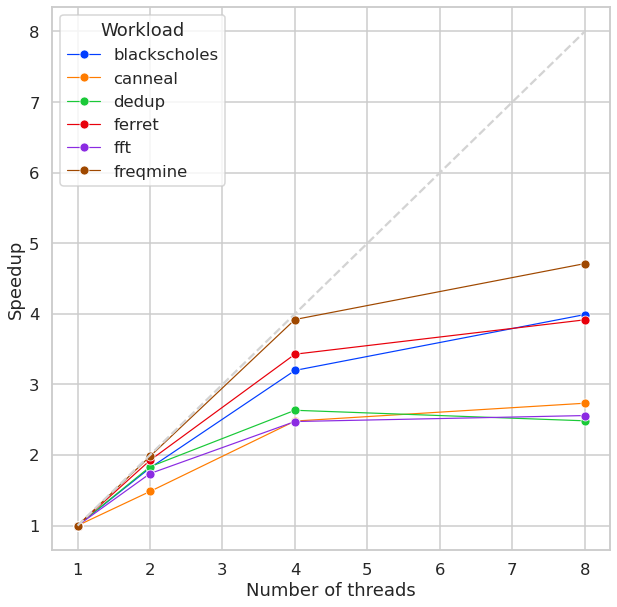

In [88]:

plt.figure(0, (10, 10))
sns.set_context("talk")
with sns.axes_style("whitegrid"):
    sns.lineplot(data=plotting_data,
             x="Number of threads",
             y="Speedup",
             hue="Workload",
             style='linear',
             marker='o',
             # dashes=True,
             legend=None,
             palette=sns.color_palette("bright", 6),
             linewidth=1.2
             )
    plt.legend(title='Workload', loc='upper left', labels=plotting_data.index)
    plt.plot([1, 8], [1, 8], color='lightgrey', linestyle='dashed')
    plt.savefig("task2.pdf", bbox_inches='tight')
    plt.show()